

---



In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from scipy.stats import zscore
import os

cwd = os.getcwd()
print("Current Working Directory:", cwd)
os.chdir(r'/content')
df = pd.read_csv("houses.csv")
df.rename(columns={'sl no.': 'sl_no'}, inplace=True)
df.set_index('sl_no', inplace=True)
df.head()

Current Working Directory: /content


,price,lot_size,waterfront,age,land_value,construction,air_cond,fuel,heat,sewer,living_area,fireplaces,bathrooms,rooms
sl_no,,,,,,,,,,,,,,
1,132500,0.09,0,42,50000,0,0,3,4,2,906,1,1.0,5
2,181115,0.92,0,0,22300,0,0,2,3,2,1953,0,2.5,6
3,109000,0.19,0,133,7300,0,0,2,3,3,1944,1,1.0,8
4,155000,0.41,0,13,18700,0,0,2,2,2,1944,1,1.5,5
5,86060,0.11,0,0,15000,1,1,2,2,3,840,0,1.0,3


# **EXPLANATION OF COLUMNS IN THE DATASET**
sl no.: A serial number assigned to each house, just to identify them.

price: The selling price of the house in dollars.

lot_size: The size of the land the house is on, measured in acres.

waterfront: Whether the house is located near a body of water (0 = No, 1 = Yes).

age: How old the house is, in years.

land_value: The estimated value of the land itself, excluding the house, in dollars.

construction: Indicates the type of construction (0 = standard, 1 = non-standard or specialized).

air_cond: Whether the house has air conditioning (0 = No, 1 = Yes).

fuel: The type of fuel used for heating (e.g., 2 = electricity, 3 = gas, 4 = oil).

heat: The type of heating system (e.g., 2 = central heating, 3 = forced air, 4 = baseboard heating).

sewer: The type of sewer system (e.g., 1 = Septic tank, 2 = Storm Sewer System, 3 = Sanitary
Sewer System).

living_area: The size of the indoor living space, measured in square feet.

fireplaces: The number of fireplaces in the house.

bathrooms: The total number of bathrooms in the house.

rooms: The total number of rooms in the house, including bedrooms and common areas.

In [ ]:
df.describe()

,price,lot_size,waterfront,age,land_value,construction,air_cond,fuel,heat,sewer,living_area,fireplaces,bathrooms,rooms
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,211966.705440,0.500214,0.008681,27.916088,34557.187500,0.046875,0.367477,2.432292,2.527778,2.695023,1754.975694,0.601852,1.900174,7.041667
std,98441.391015,0.698680,0.092791,29.209988,35021.168056,0.211432,0.482257,0.704061,0.776264,0.475379,619.935553,0.556102,0.658352,2.316453
min,5000.000000,0.000000,0.000000,0.000000,200.000000,0.000000,0.000000,2.000000,2.000000,1.000000,616.000000,0.000000,0.000000,2.000000
25%,145000.000000,0.170000,0.000000,13.000000,15100.000000,0.000000,0.000000,2.000000,2.000000,2.000000,1300.000000,0.000000,1.500000,5.000000
50%,189900.000000,0.370000,0.000000,19.000000,25000.000000,0.000000,0.000000,2.000000,2.000000,3.000000,1634.500000,1.000000,2.000000,7.000000
75%,259000.000000,0.540000,0.000000,34.000000,40200.000000,0.000000,1.000000,3.000000,3.000000,3.000000,2137.750000,1.000000,2.500000,8.250000
max,775000.000000,12.200000,1.000000,225.000000,412600.000000,1.000000,1.000000,4.000000,4.000000,3.000000,5228.000000,4.000000,4.500000,12.000000


In [ ]:
if df.isnull().values.any():
  df.fillna(df.mean(), inplace=True)

# **There is no null value**

# **Removing Outliers**

In [ ]:
def remove_outliers(df, z_thresh=3):
    # Get Z-scores for numerical columns
    z_scores = np.abs(zscore(df.select_dtypes(include=np.number)))
    # Remove rows where Z-scores are greater than 3
    df_cleaned = df[(z_scores < z_thresh).all(axis=1)]
    return df_cleaned

df_cleaned = remove_outliers(df)
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {df_cleaned.shape}")

Original dataset shape: (1728, 14)
Dataset shape after removing outliers: (1493, 14)


<Axes: >

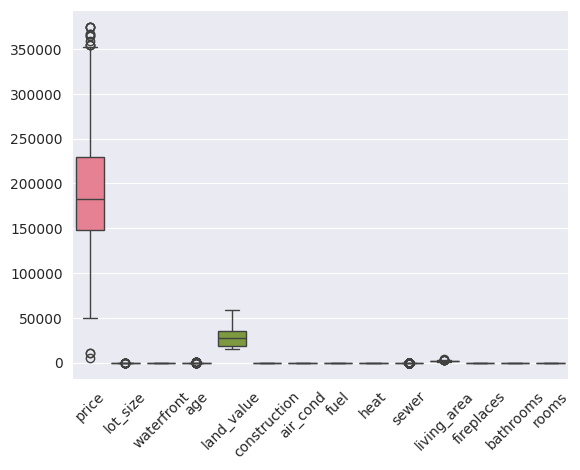

In [ ]:
Q1= df_cleaned['price'].quantile(0.25)
Q3 = df_cleaned['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df3 = df_cleaned[(df_cleaned['price'] >= lower_bound) &
(df_cleaned['price'] <= upper_bound)]
Q1= df3['price'].quantile(0.25)
Q3 = df3['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df4 = df3[(df3['price'] >= lower_bound) & (df3['price'] <=
upper_bound)]
Q1= df4['land_value'].quantile(0.25)
Q3 = df4['land_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df5 = df4[(df4['land_value'] >= lower_bound) & (df4['land_value'] <=
upper_bound)]
Q1= df5['land_value'].quantile(0.25)
Q3 = df5['land_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df6 = df5[(df5['land_value'] >= lower_bound) & (df5['land_value'] <=
upper_bound)]
Q1= df6['price'].quantile(0.25)
Q3 = df6['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df7 = df6[(df6['land_value'] >= lower_bound) & (df6['land_value'] <=
upper_bound)]
plt.xticks(rotation=45)
sns.boxplot(df7)

<Axes: >

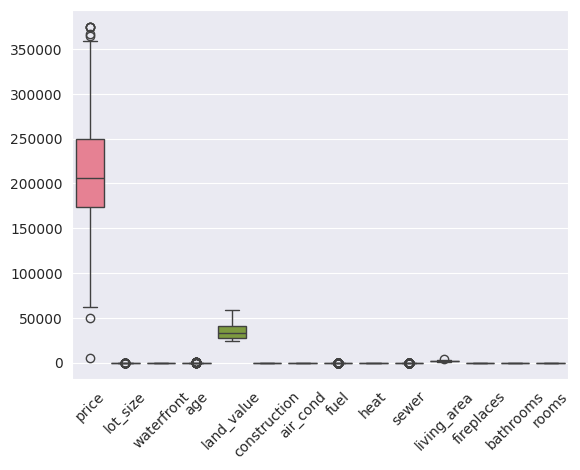

In [ ]:
Q1= df7['price'].quantile(0.25)
Q3 = df7['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df8 = df7[(df7['land_value'] >= lower_bound) & (df7['land_value'] <=
upper_bound)]
plt.xticks(rotation=45)
sns.boxplot(df8)

**After removing outliuers several times**

# **Data Visualization**

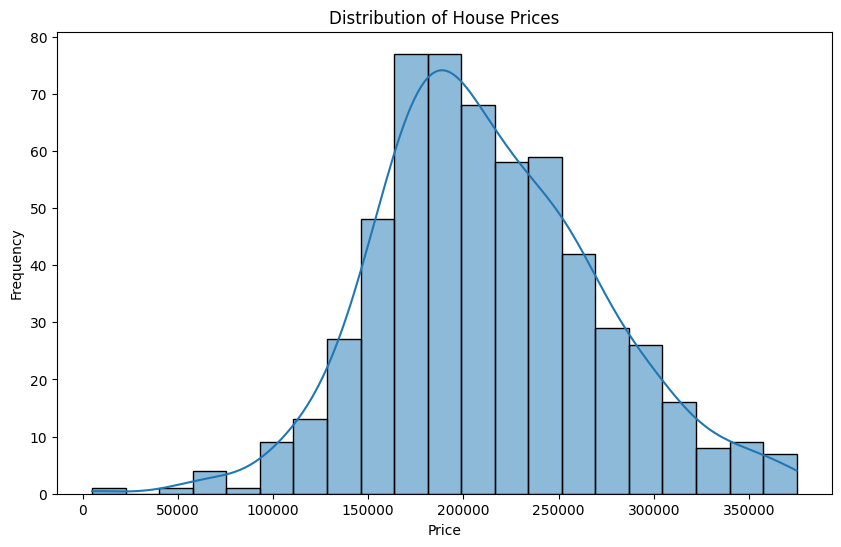

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df8['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# **The price distribution is not Normally Distributed**

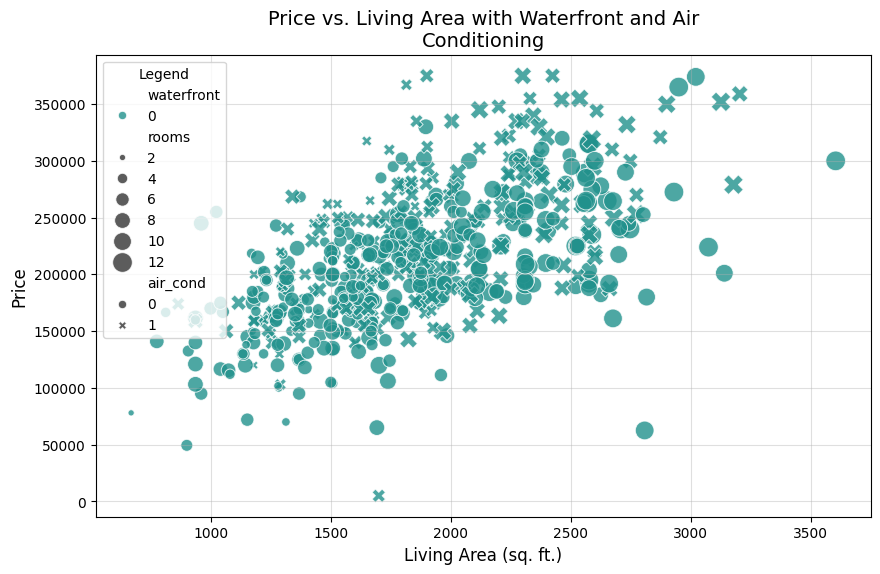

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='living_area',y='price',hue='waterfront',data=df8,palette='viridis',style='air_cond',size='rooms',sizes=(20, 200),alpha=0.8)
plt.title('Price vs. Living Area with Waterfront and Air\nConditioning', fontsize=14)
plt.xlabel('Living Area (sq. ft.)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(title='Legend', fontsize=10, loc='upper left')
plt.grid(alpha=0.4)
plt.show()


# **We can say if Living Area is increasing then price will automatically increasing bold text**

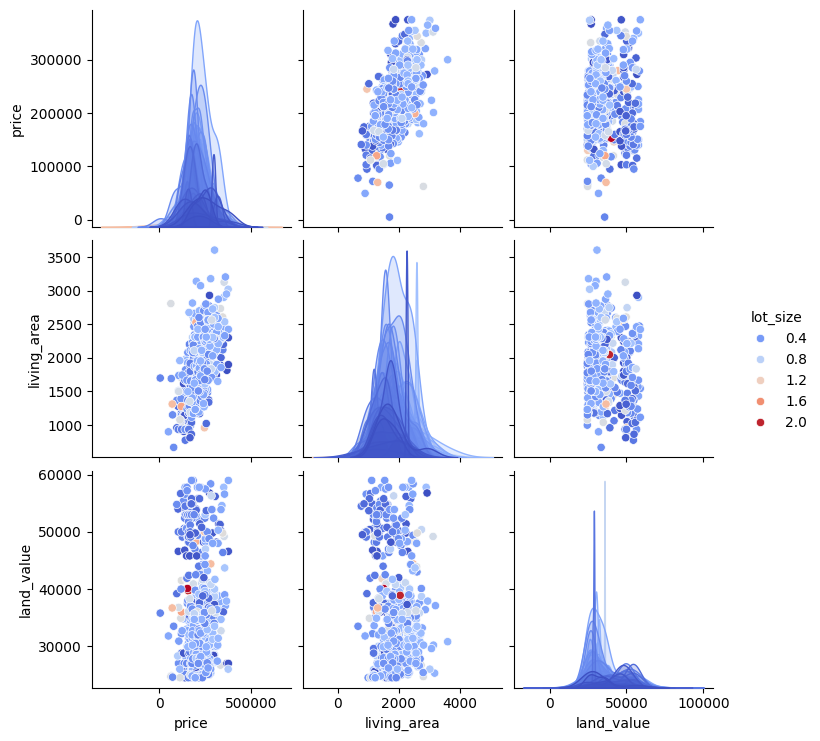

In [ ]:
sns.pairplot(df8[['price', 'lot_size', 'living_area', 'land_value']],
hue='lot_size', palette='coolwarm')
plt.show()

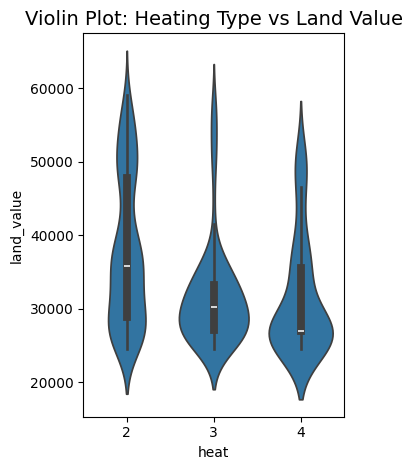

In [ ]:
plt.subplot(1, 2, 2)
sns.violinplot(x="heat", y="land_value", data=df8)
plt.title("Violin Plot: Heating Type vs Land Value", fontsize=14)
plt.tight_layout()
plt.show()

**If heating type is electric then more price**

**If heating type is gas then less price**

If heating type is solar then relatively more price than
gas **bold text**

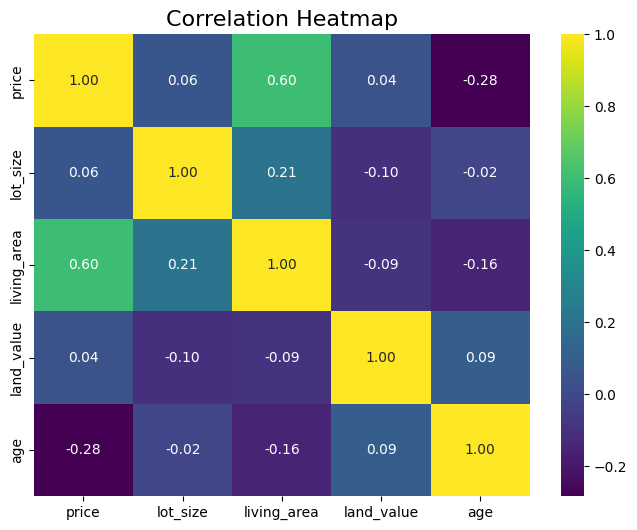

In [ ]:
correlation_matrix = df8[['price','lot_size', 'living_area',
'land_value', 'age']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

X = df8[['lot_size', 'living_area', 'bathrooms']]
y = df8['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nLinear Regression Model Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Linear Regression Model Evaluation:
Mean Squared Error: 2492043388.08
R-squared: 0.31


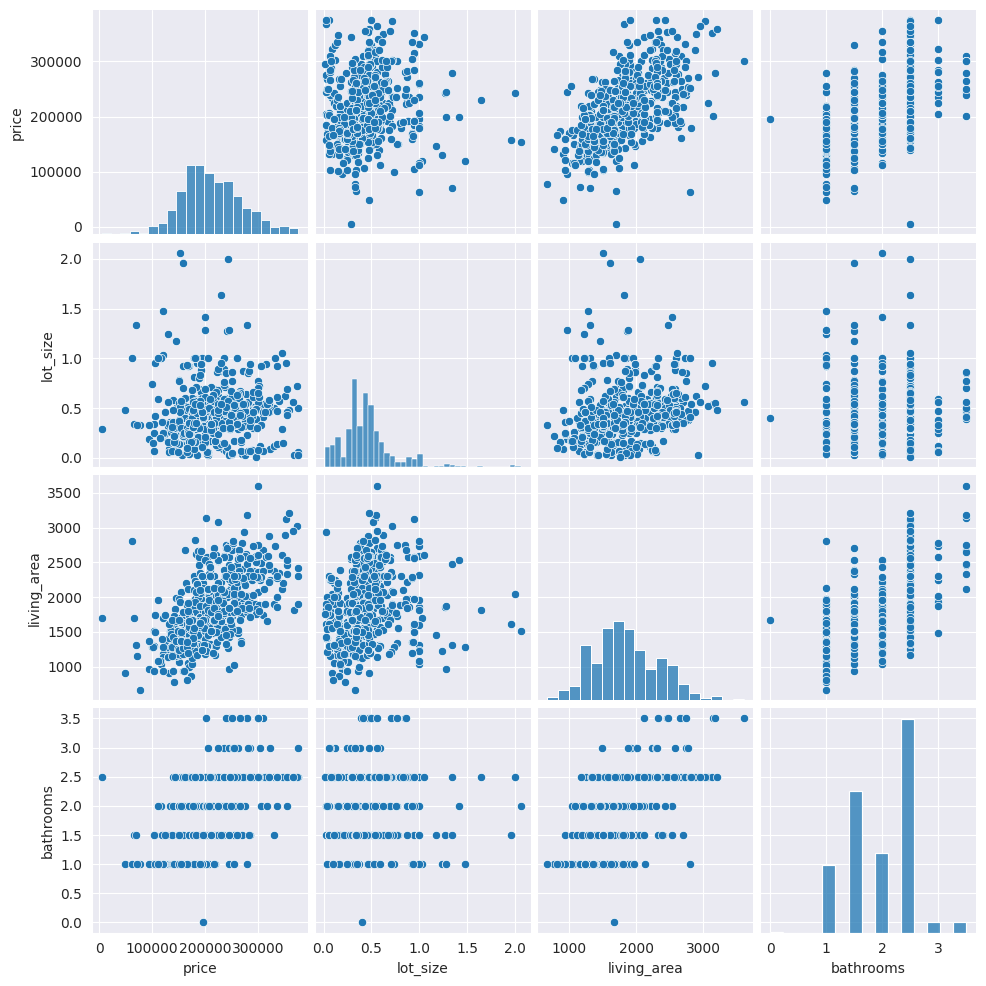

In [ ]:
sns.pairplot(df8[['price', 'lot_size', 'living_area', 'bathrooms']])
plt.show()

**Relationships:**
1.   Price vs. Living Area: You'll likely see a positive correlation between price and living_area. This means that as the living area of a house increases, the price tends to increase as well. This relationship might be quite strong, indicated by a clear upward trend in the scatter plot between these two variables.
2.   Price vs. Lot Size: There's likely a positive correlation between price and lot_size as well, although it may not be as strong as the relationship with living area. This suggests that houses with larger lot sizes generally have higher prices.
3. Price vs. Bathrooms: You might see a positive trend between price and bathrooms, indicating that houses with more bathrooms tend to have higher prices. This relationship could be influenced by the overall size and features of the house.
4. Other Relationships: The pair plot also shows relationships between the other variables (e.g., lot_size vs. living_area, living_area vs. bathrooms). These can reveal further insights into the characteristics of houses and how they relate to each other.

**Distributions:**

1. Price: The distribution of price will be visible along the diagonal of the pair plot. You might observe that it's slightly skewed to the right, meaning there are some higher-priced houses that pull the distribution in that direction.

2. Other Variables: You'll also see the distributions of lot_size, living_area, and bathrooms, giving you an idea of their typical values and how they vary.

**Patterns and Clusters:**

1. Clusters: The pair plot might reveal potential clusters within the data. For example, you might see a group of houses with large lot sizes and high prices, forming a distinct cluster in the corresponding scatter plots.

2. Non-linear Relationships: The plots could also highlight non-linear relationships between variables. For instance, the relationship between price and living_area might not be perfectly linear, showing some curvature.

**Important Considerations:**

1. Correlation vs. Causation: Remember that correlation doesn't necessarily imply causation. While the pair plot helps identify relationships, it doesn't confirm that one variable directly causes changes in another.

2. Outliers: Pay attention to outliers in the plots, as they can affect the interpretation of relationships.

3. Data Cleaning: Make sure your data has been properly cleaned and preprocessed before creating the pair plot, as errors or missing values can influence the results.

In [ ]:
df8.columns = df8.columns.str.strip().str.lower()
X = df8[['lot_size', 'living_area', 'bathrooms']]
y = df8['price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     130.0
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           2.68e-64
Time:                        18:11:33   Log-Likelihood:                -7036.0
No. Observations:                 580   AIC:                         1.408e+04
Df Residuals:                     576   BIC:                         1.410e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.037e+04   7861.462      8.951      

In [ ]:
coefficients = model.coef_
intercept = model.intercept_
results = pd.DataFrame({
    "Coefficient": coefficients,
    "Intercept": intercept
})

print("\nCoefficients with P-Values:")
print(results)


Coefficients with P-Values:
    Coefficient     Intercept
0  -8629.644449  68281.194336
1     51.165845  68281.194336
2  27273.890371  68281.194336


*   The analysis revealed a strong positive correlation between living area and price. Larger houses tend to have higher prices.
*   Lot size and land value also show a positive correlation with price, although not as strong as living area.
*   The linear regression model provided reasonable predictions for house prices based on the selected features.
*   Statistical analysis indicated the significance of the predictor variables in explaining price variations.



